In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Top 5 zipcodes for 911 calls 
df['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [7]:
#Top 5 zipcodes for 911 calls 
df['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [8]:
# Unique Title Codes
df['title'].nunique()

131

In [9]:
#Creating New Features
x = df['title'].iloc[0]

In [10]:
x.split(':')[0]

'EMS'

In [11]:
df['Reason'] = df['title'].apply(lambda title: title.split(
':')[0])

In [12]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
289235        EMS
289236       Fire
289237    Traffic
289238    Traffic
289239    Traffic
Name: Reason, Length: 289240, dtype: object

In [13]:
#Common Reason for 911 Call
df['Reason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

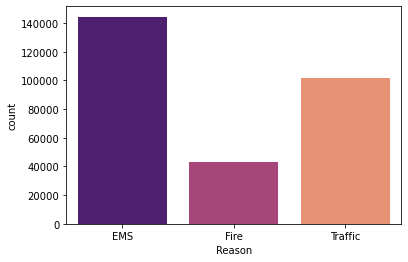

In [14]:
# Countplot
sns.countplot(x='Reason',data=df,palette='magma')

In [15]:
#Converting Time Columns to TimeStamp
type(df['timeStamp'].iloc[0])

str

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
time = df['timeStamp']
time[0].hour

17

In [19]:
time[4].dayofweek

3

In [20]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [22]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [25]:
#Mapping the Day of the Weeks
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


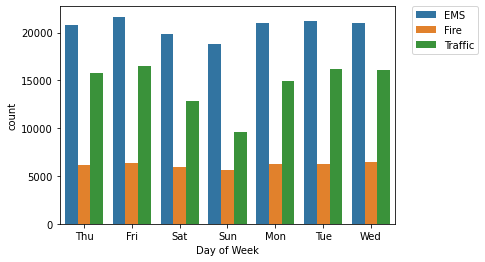

In [36]:
#Countplot of the Days of Week with Reason
sns.countplot(x='Day of Week', data = df,hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

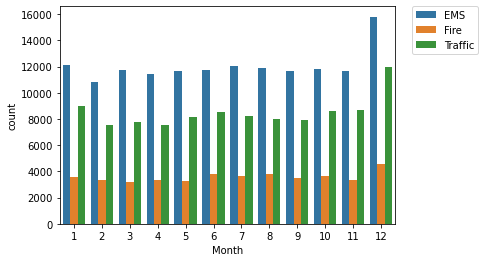

In [42]:
#Countplot of the Months with Reason
sns.countplot(x='Month', data = df,hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [64]:
#Create Date Column
t = df['timeStamp'].iloc[0]

In [54]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

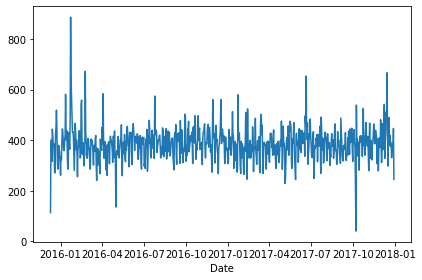

In [67]:
# Number of Calls by the Date for the Latitude
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

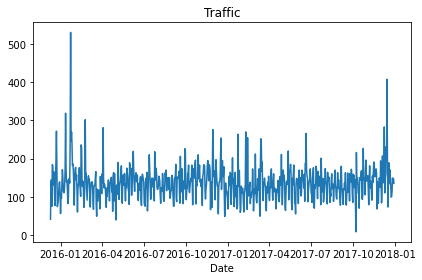

In [70]:
#Plots of Calls by Reasons
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [74]:
#Grouping by Days of Week and Hour using Unstack
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

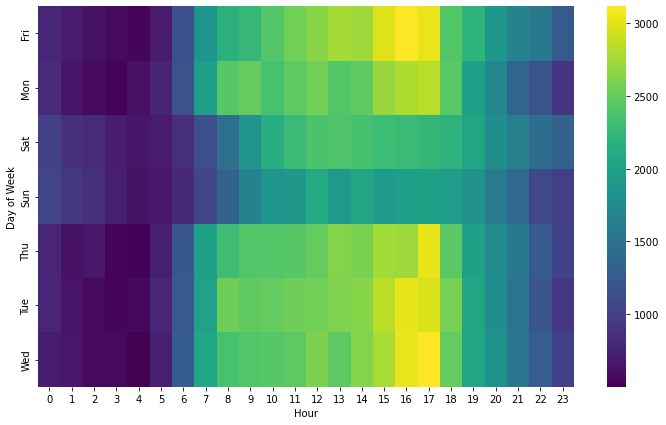

In [78]:
#Heatmap of the Above
plt.figure(figsize=(12,7))
sns.heatmap(dayHour,cmap='viridis')

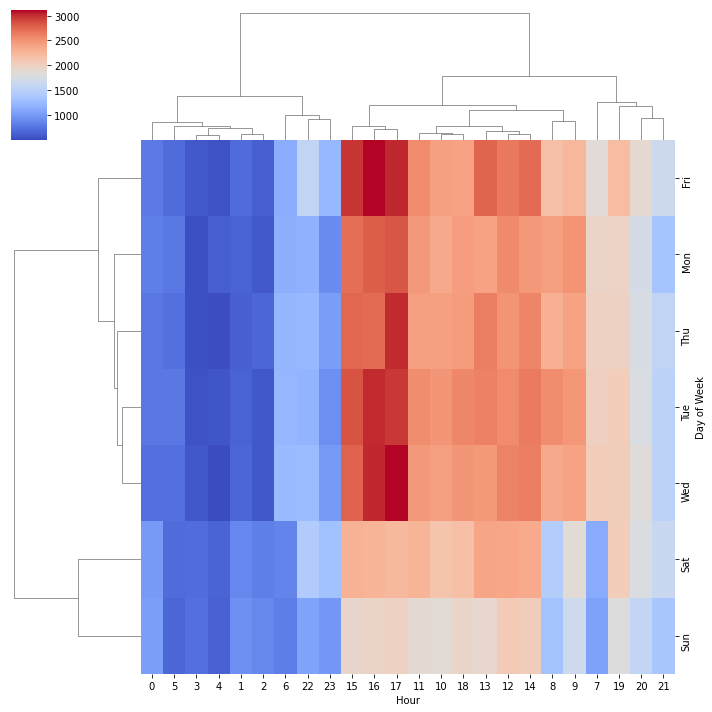

In [89]:
#Clustermap of the Above
sns.clustermap(dayHour, cmap = 'coolwarm')

In [86]:
#Grouping by Days of Week and Month using Unstack
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

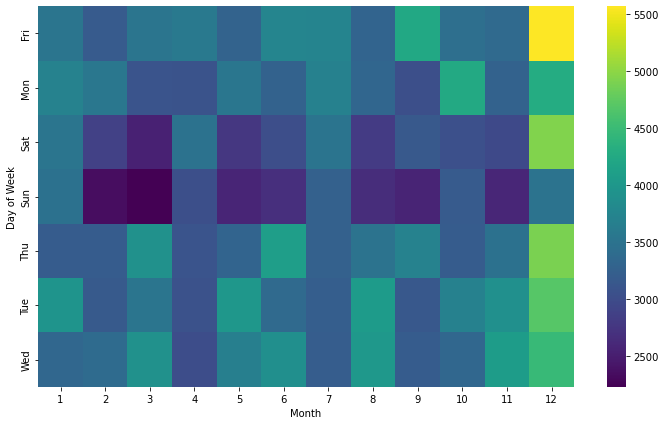

In [88]:
#Heatmap of the Above
plt.figure(figsize=(12,7))
sns.heatmap(dayMonth,cmap='viridis')